# Data download

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# tick = "GC=F CL=F SPY ^FTSE"
# intv = '1d'
# strpdt = 'd'
# col = 'Close'

# dfd = yf.download(tickers = tick, period='max', interval = intv, groupby = 'ticker')
# df = dfd['Close']

[*********************100%***********************]  4 of 4 completed


In [47]:
df = pd.read_csv(r'C:\Users\maxim\Documents\GitHub\gold-forecast\oilgoldspftse.csv')
df.set_index('Date', drop=True, inplace=True)
df.set_index(pd.to_datetime(df.index), inplace=True)
df.rename(columns={'CL=F':'CrudeOil', 'GC=F':'Gold', 'SPY':'S&P500', '^FTSE':'FTSE'}, inplace=True)
df.head()

,CrudeOil,Gold,S&P500,FTSE
Date,,,,
2000-08-30,33.400002,273.899994,150.34375,6615.100098
2000-08-31,33.099998,278.299988,152.34375,6672.700195
2000-09-01,33.380001,277.000000,152.50000,6795.000000
2000-09-05,33.799999,275.799988,151.28125,6752.500000
2000-09-06,34.950001,274.200012,149.56250,6694.700195


In [48]:
dfpc = df.copy()
dfpc = dfpc.pct_change()
dfpc.head()

,CrudeOil,Gold,S&P500,FTSE
Date,,,,
2000-08-30,NaN,NaN,NaN,NaN
2000-08-31,-0.008982,0.016064,0.013303,0.008707
2000-09-01,0.008459,-0.004671,0.001026,0.018328
2000-09-05,0.012582,-0.004332,-0.007992,-0.006255
2000-09-06,0.034024,-0.005801,-0.011361,-0.008560


In [49]:
cpi = pd.read_csv(r'C:\Users\maxim\Documents\GitHub\gold-forecast\CPIAUCSL.csv')
cpi.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [50]:
#data join


#

<AxesSubplot: >

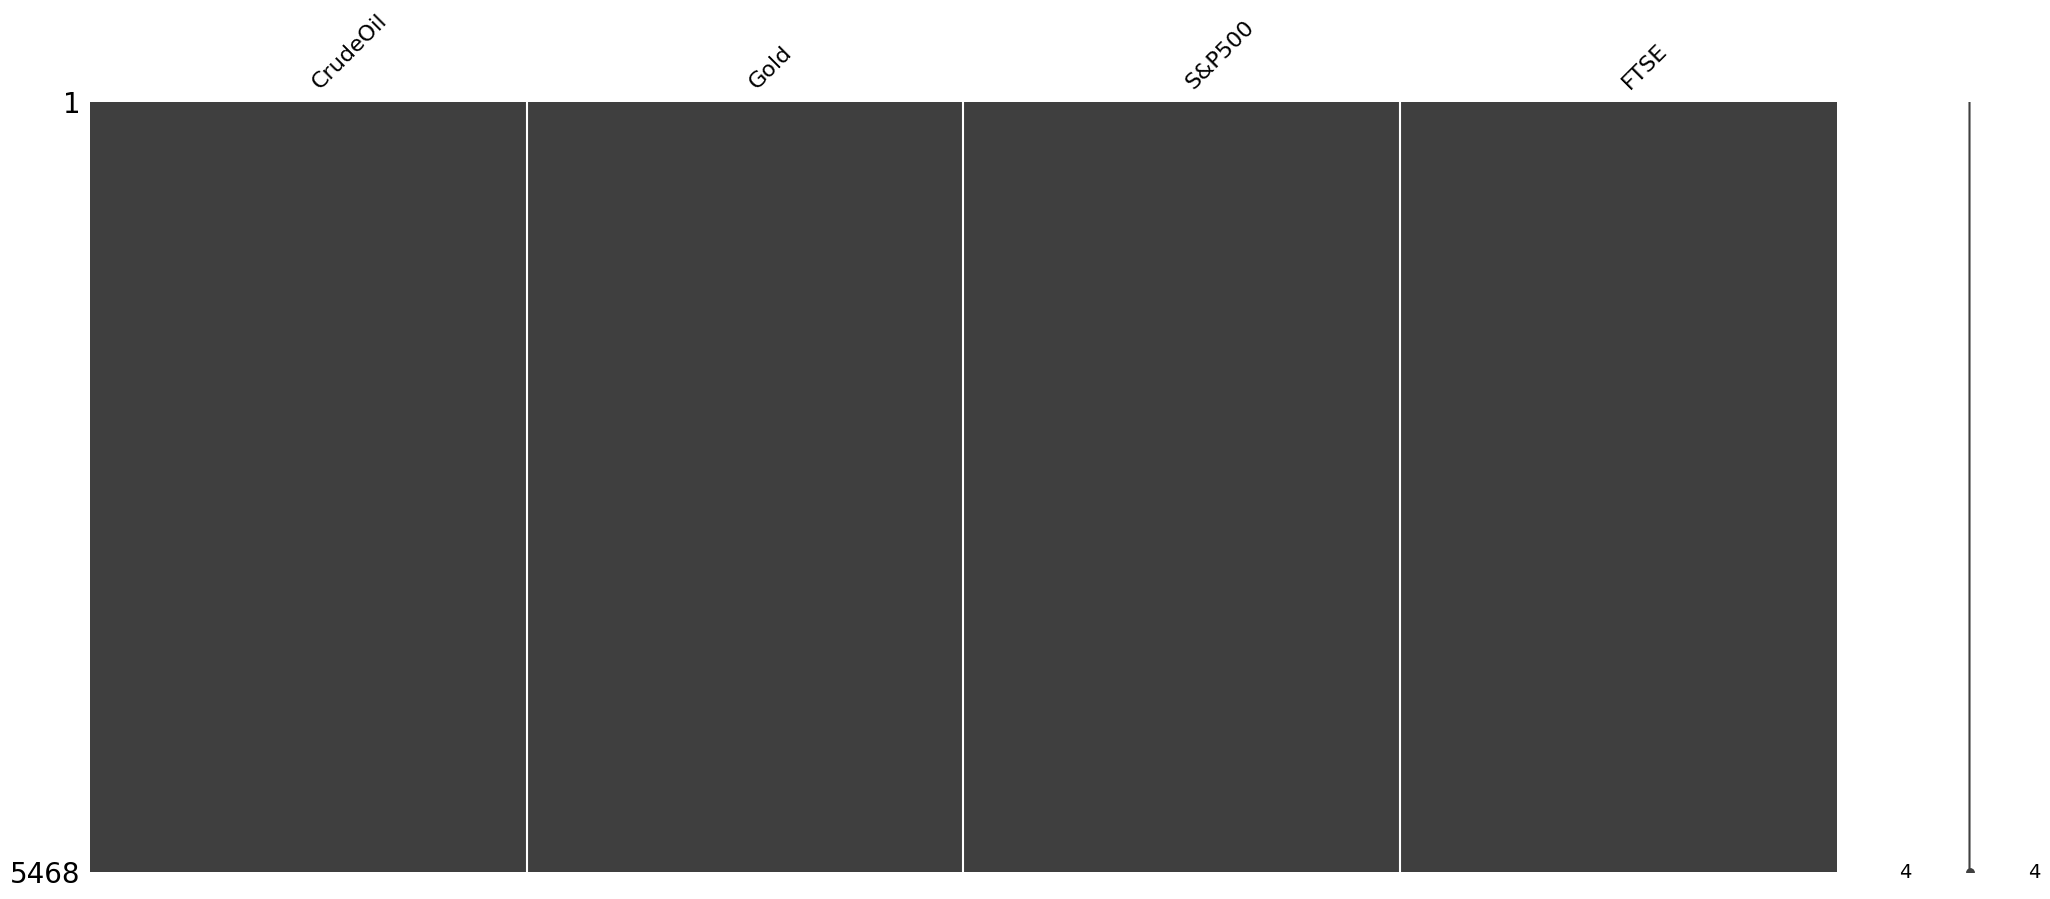

In [51]:
import missingno as msno
msno.matrix(df)

In [52]:
#df = df.dropna()
display(df.head())
df.tail()

,CrudeOil,Gold,S&P500,FTSE
Date,,,,
2000-08-30,33.400002,273.899994,150.34375,6615.100098
2000-08-31,33.099998,278.299988,152.34375,6672.700195
2000-09-01,33.380001,277.000000,152.50000,6795.000000
2000-09-05,33.799999,275.799988,151.28125,6752.500000
2000-09-06,34.950001,274.200012,149.56250,6694.700195


,CrudeOil,Gold,S&P500,FTSE
Date,,,,
2022-11-10,86.470001,1750.300049,394.690002,7375.299805
2022-11-11,88.959999,1766.000000,398.510010,7318.000000
2022-11-14,85.870003,1773.599976,395.119995,7385.200195
2022-11-15,86.919998,1773.800049,398.489990,7369.399902
2022-11-16,85.309998,1777.000000,395.450012,7351.189941


In [53]:
#df.to_csv(r'C:\Users\maxim\Documents\GitHub\gold-forecast\oilgoldspftse.csv')

---
# PRICE AND VOLATILITY PLOTS
---

## Gold

Text(0.5, 1.0, 'Gold return volatility 30-08-2000 to 16-11-2022')

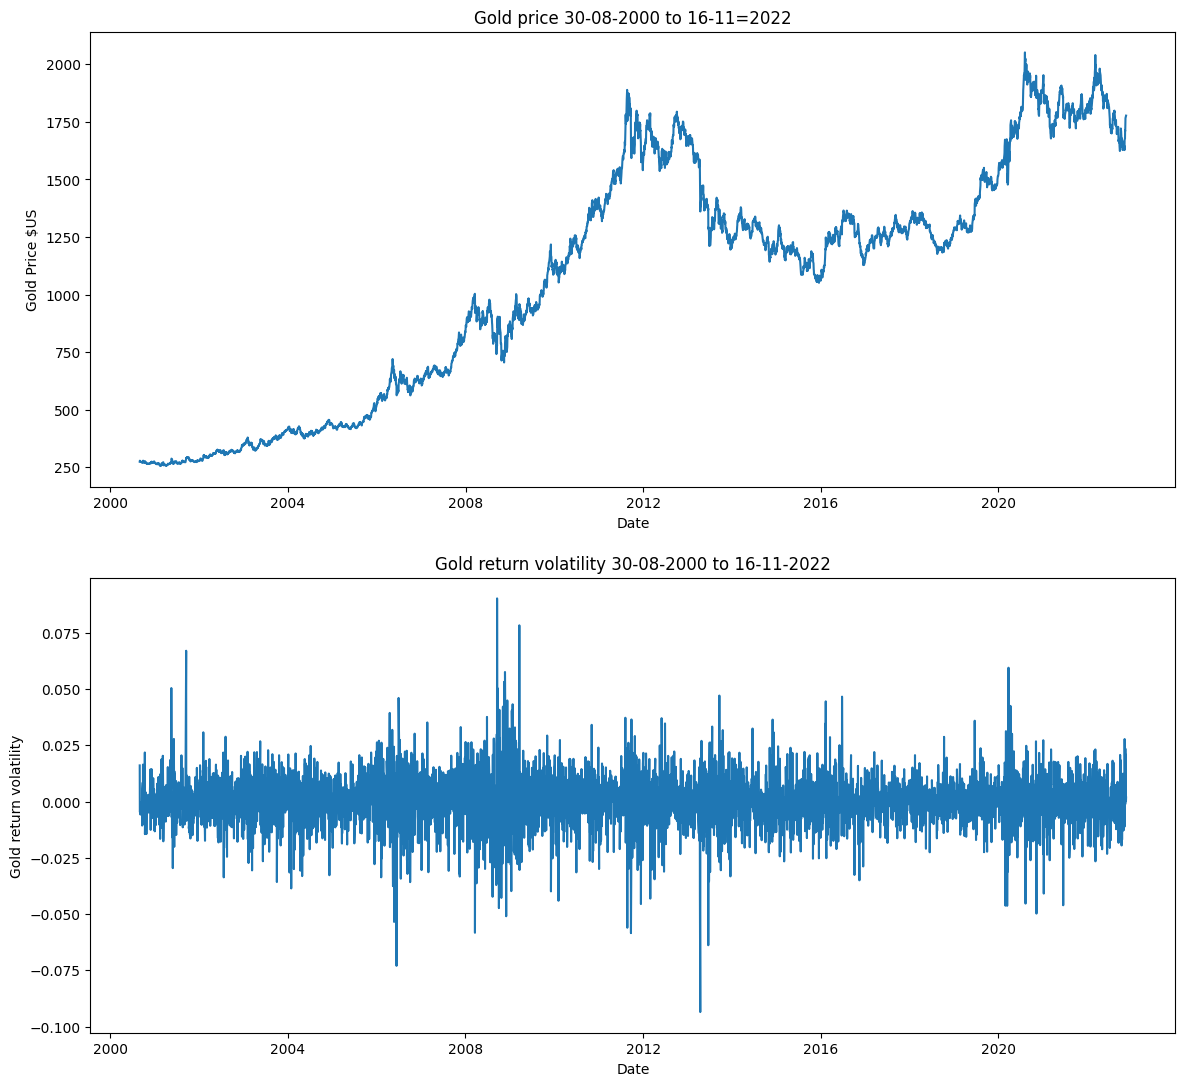

In [56]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(14,13))
sns.lineplot(x=df.index, y='Gold', data=df, ax=ax1)
ax1.set_ylabel('Gold Price $US')
ax1.set_xlabel('Date')
ax1.set_title('Gold price 30-08-2000 to 16-11=2022')

sns.lineplot(x=df.index, y='Gold', data=dfpc, ax=ax2)
ax2.set_ylabel('Gold return volatility')
ax2.set_xlabel('Date')
ax2.set_title('Gold return volatility 30-08-2000 to 16-11-2022')


##  Oil 

Text(0.5, 1.0, 'Oil return volatility 30-08-2000 to 16-11-2022')

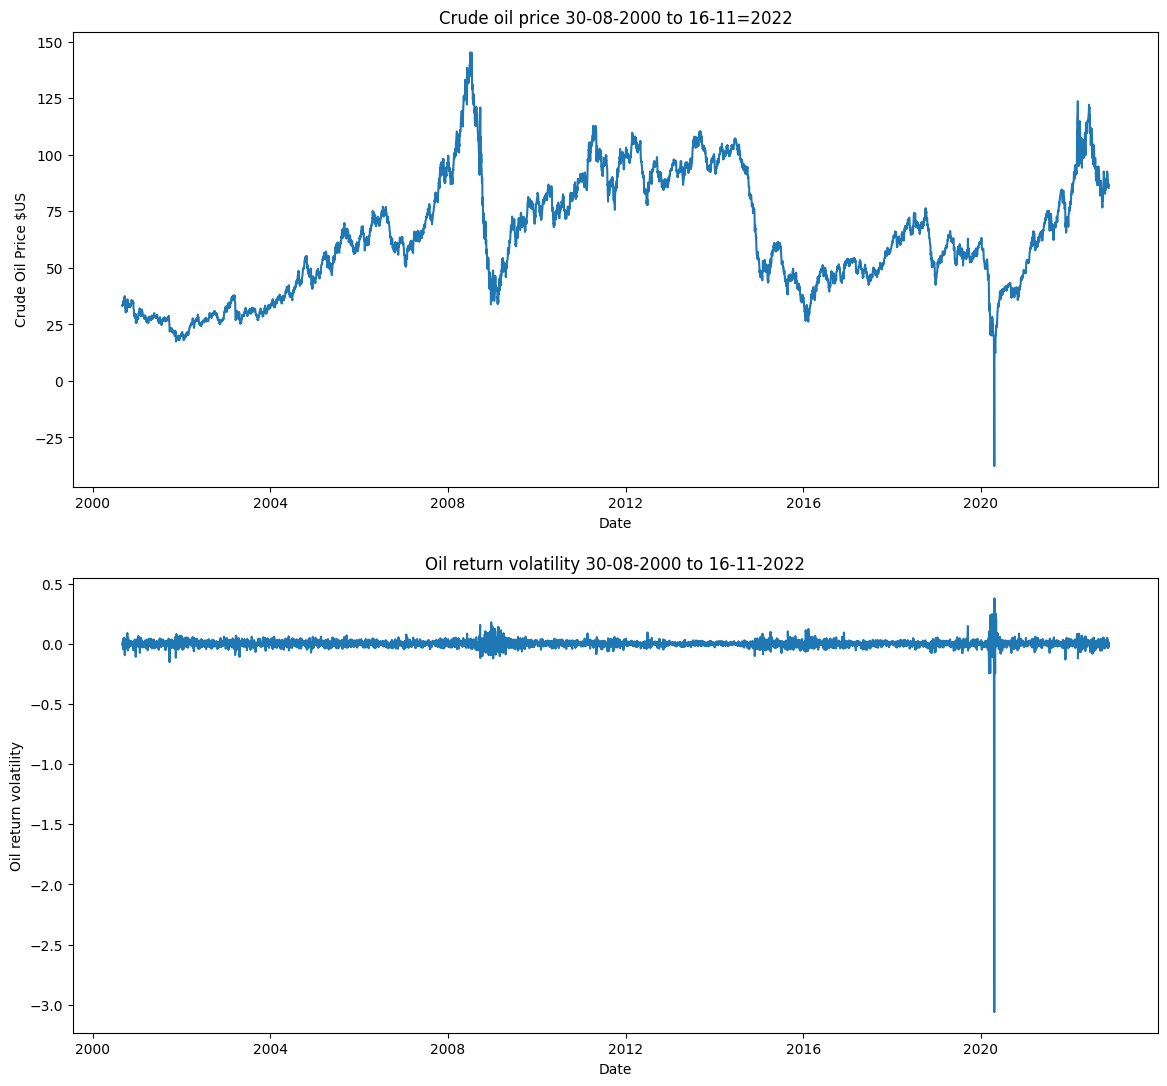

In [57]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(14,13))
sns.lineplot(x=df.index, y='CrudeOil', data=df, ax=ax1)
ax1.set_ylabel('Crude Oil Price $US')
ax1.set_xlabel('Date')
ax1.set_title('Crude oil price 30-08-2000 to 16-11=2022')

sns.lineplot(x=df.index, y='CrudeOil', data=dfpc, ax=ax2)
ax2.set_ylabel('Oil return volatility')
ax2.set_xlabel('Date')
ax2.set_title('Oil return volatility 30-08-2000 to 16-11-2022')

## S&P500

Text(0.5, 1.0, 'S&P 500 return volatility 30-08-2000 to 16-11=2022')

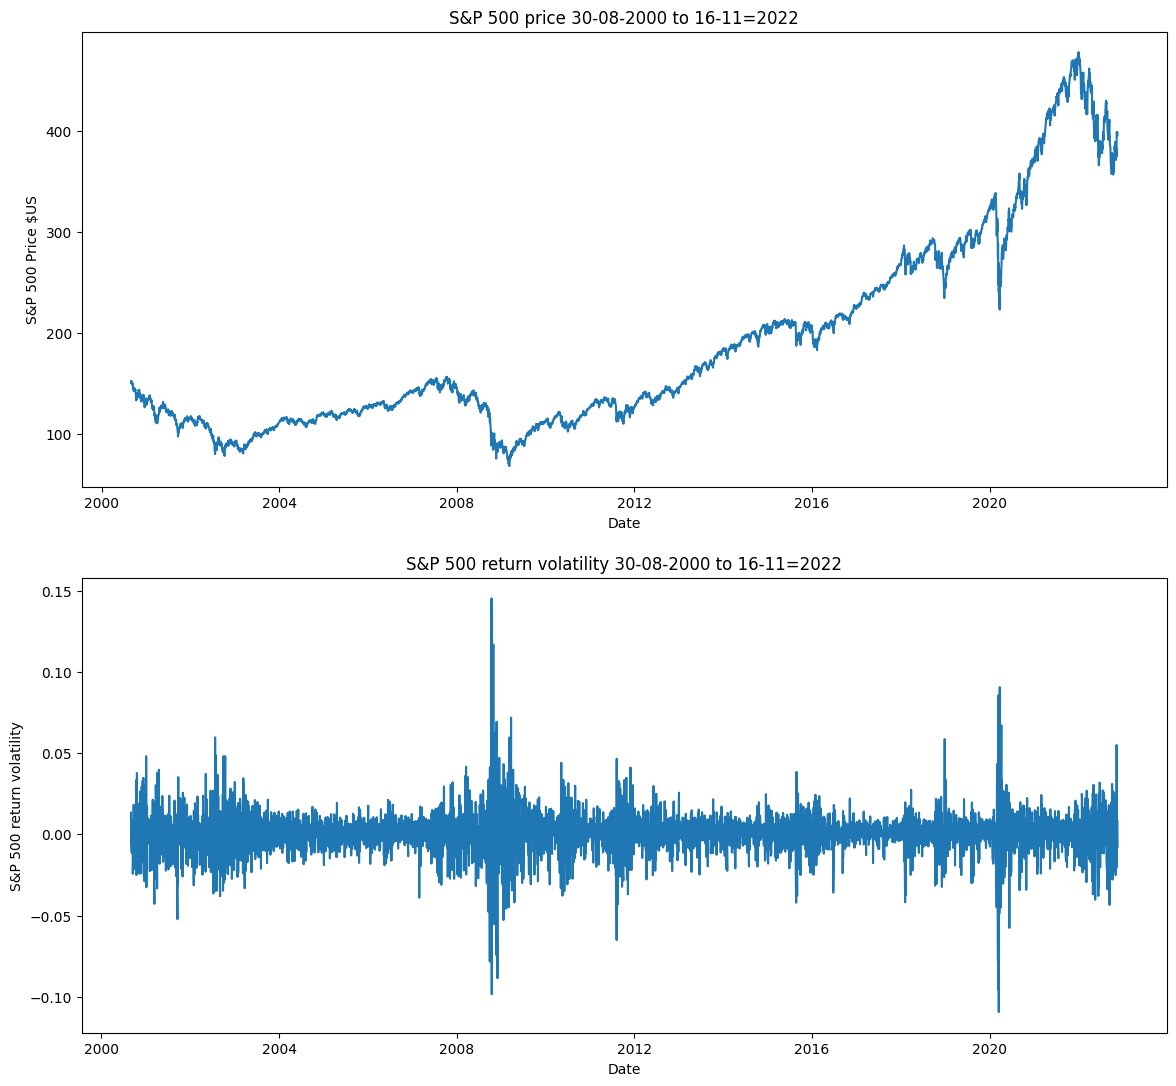

In [58]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(14,13))
sns.lineplot(x=df.index, y='S&P500', data=df, ax=ax1)
ax1.set_ylabel('S&P 500 Price $US')
ax1.set_xlabel('Date')
ax1.set_title('S&P 500 price 30-08-2000 to 16-11=2022')

sns.lineplot(x=df.index, y='S&P500', data=dfpc, ax=ax2)
ax2.set_ylabel('S&P 500 return volatility')
ax2.set_xlabel('Date')
ax2.set_title('S&P 500 return volatility 30-08-2000 to 16-11=2022')

## FTSE

Text(0.5, 1.0, 'FTSE price volatility 30-08-2000 to 16-11=2022')

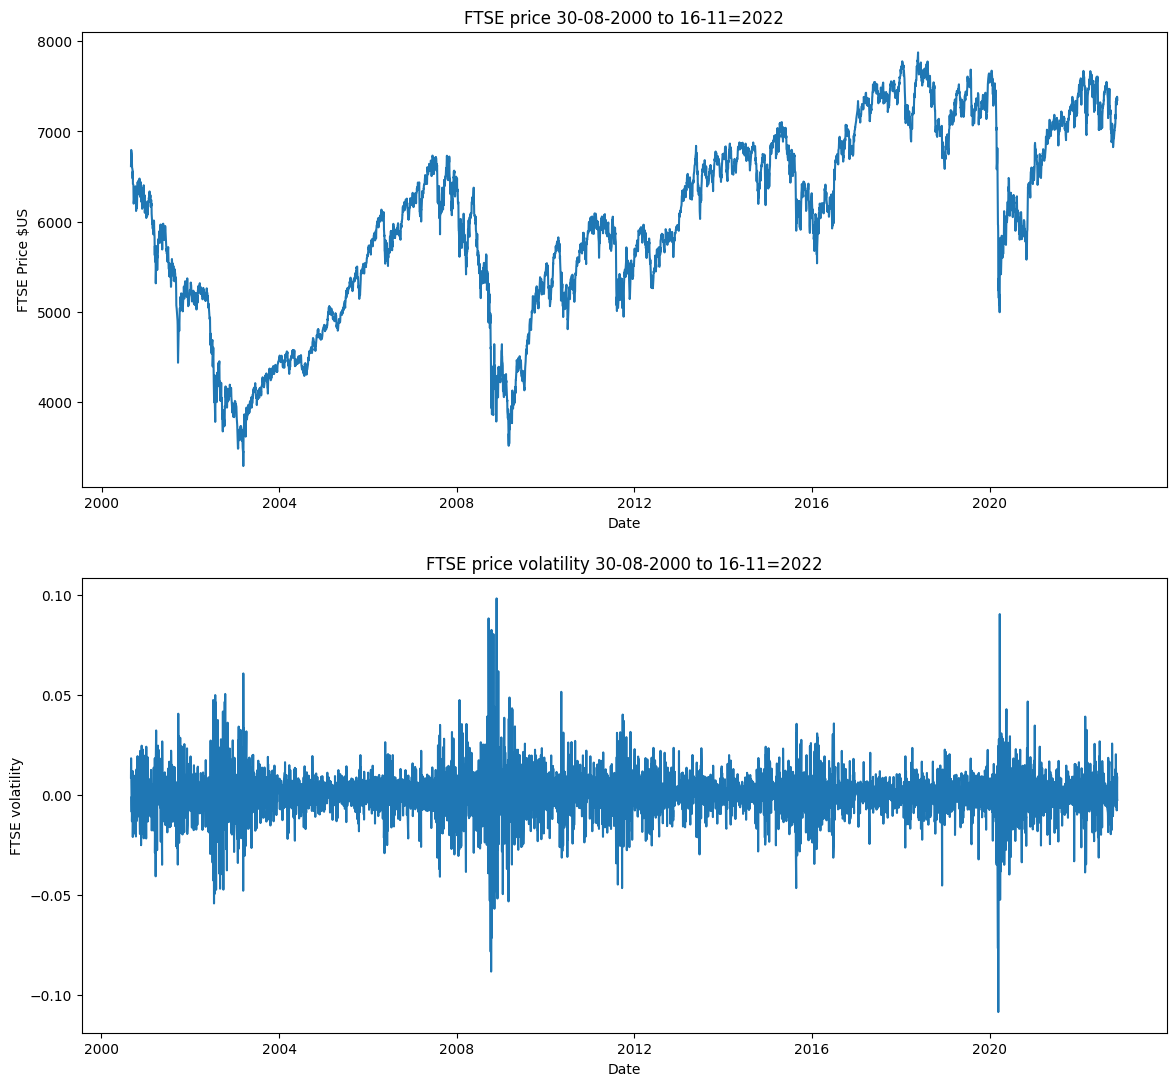

In [59]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(14,13))
sns.lineplot(x=df.index, y='FTSE', data=df, ax=ax1)
ax1.set_ylabel('FTSE Price $US')
ax1.set_xlabel('Date')
ax1.set_title('FTSE price 30-08-2000 to 16-11=2022')

sns.lineplot(x=df.index, y='FTSE', data=dfpc, ax=ax2)
ax2.set_ylabel('FTSE volatility')
ax2.set_xlabel('Date')
ax2.set_title('FTSE price volatility 30-08-2000 to 16-11=2022')

---
# CORRELATION

          CrudeOil      Gold    S&P500      FTSE
CrudeOil  1.000000  0.519435  0.121312  0.321348
Gold      0.519435  1.000000  0.692319  0.607655
S&P500    0.121312  0.692319  1.000000  0.752818
FTSE      0.321348  0.607655  0.752818  1.000000


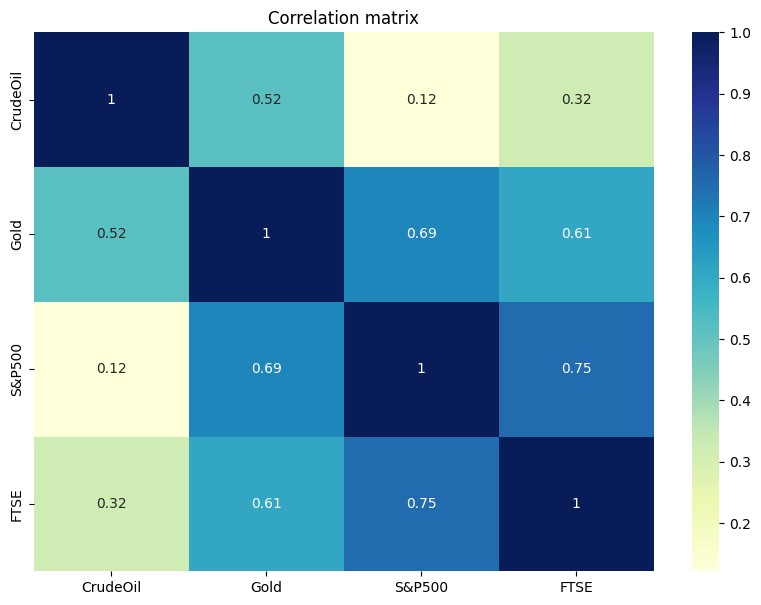

In [65]:
print(df.corr())
  
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
plt.title('Correlation matrix')
plt.show()